Example 1

$\textbf{Performing Discrete Wavelet Transform}$


The Haar transform decomposes a signal by looking at pairs of numbers.
1. Approximation ($A$): The average of the pair: $\frac{x_1 + x_2}{2}$ (multiplied by $\sqrt{2}$ for energy normalization).
2. Detail ($D$): The difference of the pair: $\frac{x_1 - x_2}{2}$ (multiplied by $\sqrt{2}$ for energy normalization).

Here we have the signal $$S = [0, 2, 4, 6, 8, 10, 12, 14, 16, 16, 16, 16, 12, 8, 4, 0]$$

In this example we will calculate the unnormalized version (Simplle average & difference)

We start with the level 1 decomposition.

Approximations ($A_1$): $$(0+2)/2 = 1$$ $$(4+6)/2 = 5$$ $$(8+10)/2 = 9$$ $$(12+14)/2 = 13$$ $$(16+16)/2 = 16$$ $$(16+16)/2 = 16$$ $$(12+8)/2 = 10$$ $$(4+0)/2 = 2$$ $$ A_1 = [1, 5, 9, 13, 16, 16, 10, 2]$$

Details ($D_1$): $$(0-2)/2 = -1$$ $$(4-6)/2 = -1$$ $$(8-10)/2 = -1$$ $$(12-14)/2 = -1$$ $$(16-16)/2 = 0$$ $$(16-16)/2 = 0$$ $$(12-8)/2 = 2$$ $$(4-0)/2 = 2$$ $$D_1 = [-1, -1, -1, -1, 0, 0, 2, 2]$$



Level 2 DecompositionTaking

$A_1$ as the input, we group pairs: $(1,5), (9,13), (16,16), (10,2)$

Approximations ($A_2$): $$(1+5)/2 = 3$$ $$(9+13)/2 = 11$$ $$(16+16)/2 = 16$$ $$(10+2)/2 = 6$$ $$A_2 = [3, 11, 16, 6]$$

Details ($D_2$): $$(1-5)/2 = -2$$ $$(9-13)/2 = -2$$ $$(16-16)/2 = 0$$ $$(10-2)/2 = 4$$ $$ D_2 = [-2, -2, 0, 4]$$
The final "Wavelet Coefficient" vector is formed by taking the last Approximation and all preceding Details:

$$[A_2, D_2, D_1] = [3, 11, 16, 6, -2, -2, 0, 4, -1, -1, -1, -1, 0, 0, 2, 2]$$

In [1]:
# Version requirements: Python 3.14.2, numpy 2.3.5, matplotlib 3.10.8, pywt 1.8.0, scipy 1.16.3
import numpy as np
import matplotlib.pyplot as plt
import pywt

In [2]:
# Sanity check of calculating wavelet coefficients using PyWavelets
# Define the signal
signal = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16, 16, 16, 16, 12, 8, 4, 0])

# Perform the DWT using the Haar wavelet
coeffs = pywt.wavedec(signal, 'haar', level=2)

# Extract levels
A2, D2, D1 = coeffs

print("Original Signal: ", signal)
print("---" * 10)
print("Level 3 Approx (A2):", A2 / np.sqrt(2)**2)
print("Level 2 Detail (D2):", D2 / (np.sqrt(2))**2)
print("Level 1 Detail (D1):", D1 / np.sqrt(2))

Original Signal:  [ 0  2  4  6  8 10 12 14 16 16 16 16 12  8  4  0]
------------------------------
Level 3 Approx (A2): [ 3. 11. 16.  6.]
Level 2 Detail (D2): [-2. -2.  0.  4.]
Level 1 Detail (D1): [-1. -1. -1. -1.  0.  0.  2.  2.]


Example 2

In [3]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

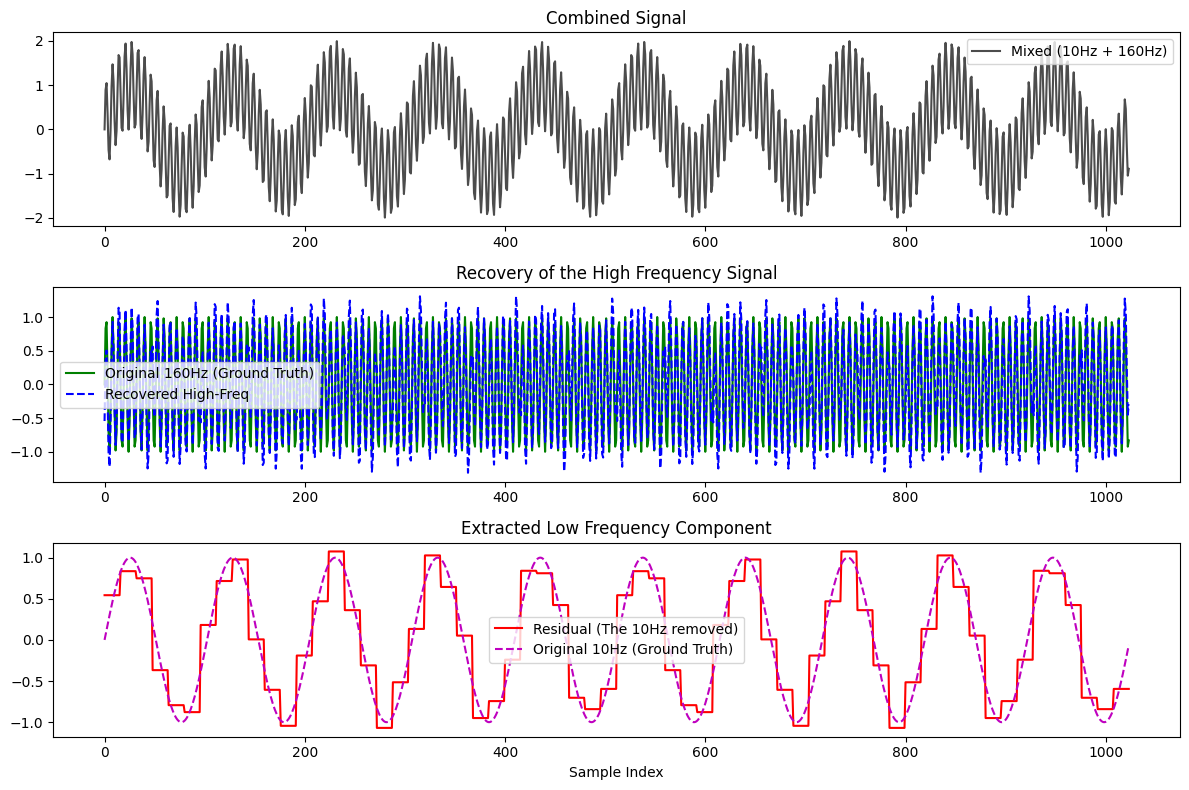

In [4]:

N = 1024 
indices = np.arange(N)
i_norm = indices / N 

slow_signal = np.sin(2 * np.pi * 10 * i_norm)

fast_signal = np.sin(2 * np.pi * 160 * i_norm)

Mixed_signal = slow_signal + fast_signal

def wavelet_highpass(signal, wavelet='haar', level=4):
    # Note for Jason, be carefull of levels and signal length. The Signal length formula is:
    # L_out = [(L_in + Filterlength -2) / 2] + 1 
    # So level 1 with db4 (filter length of 8) = 516 coffs
    # Level 2 = 262 coeffs
    # Level 3 = 136 coeffs
    # Level 4 = 72 coeffs, i.e. db4 can handle level 4 for signals of length 1024 without padding.
    
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    
    coeffs[0] = np.zeros_like(coeffs[0])
    
    return pywt.waverec(coeffs, wavelet)

cleaned_signal = wavelet_highpass(Mixed_signal, level=4)

# 4. Plotting
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(indices, Mixed_signal, 'k', alpha=0.7, label='Mixed (10Hz + 160Hz)')
plt.title("Combined Signal")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(indices, fast_signal, 'g', label='Original 160Hz (Ground Truth)')
plt.plot(indices, cleaned_signal, 'b--', label='Recovered High-Freq')
plt.title("Recovery of the High Frequency Signal")
plt.legend()

plt.subplot(3, 1, 3)
residual = Mixed_signal - cleaned_signal
plt.plot(indices, residual, 'r', label='Residual (The 10Hz removed)')
plt.plot(indices, slow_signal, 'm--', label='Original 10Hz (Ground Truth)')
plt.title("Extracted Low Frequency Component")
plt.xlabel("Sample Index")
plt.legend()

plt.tight_layout()
plt.show()

Example 3

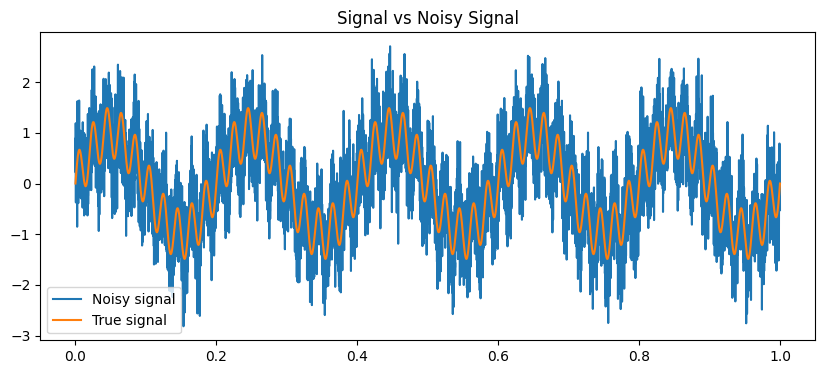

In [5]:
np.random.seed(0)

x = np.linspace(0, 1, 8192)

signal = np.sin(2 * np.pi * 5 * x) + 0.5 * np.sin(2 * np.pi * 50 * x)

noise = 0.5 * np.random.normal(size=x.shape)
noisy_signal = signal + noise

plt.figure(figsize=(10,4))
plt.plot(x, noisy_signal, label="Noisy signal")
plt.plot(x, signal, label="True signal")
plt.legend()
plt.title("Signal vs Noisy Signal")
plt.show()



In [6]:
data_to_save = np.column_stack((x, signal, noisy_signal))

np.savetxt("signal_data.csv", data_to_save, delimiter=",", header="x,true_signal,noisy_signal", comments='')

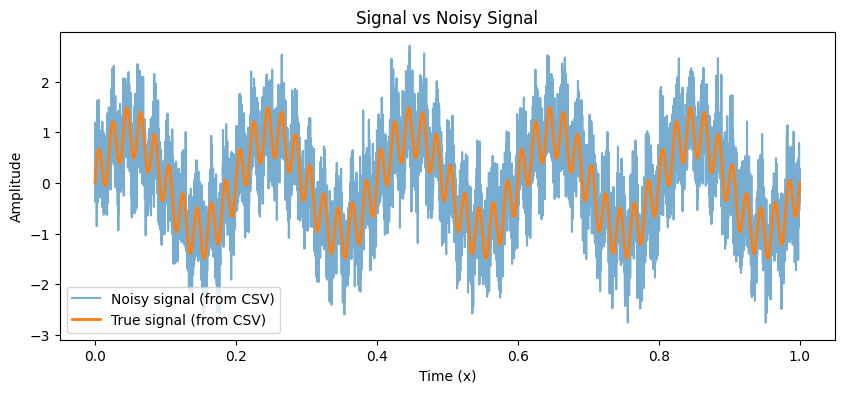

In [7]:
x, signal, noisy = np.loadtxt("C:\\Users\\User\\Desktop\\WaveLets\\signal_data.csv", delimiter=",", skiprows=1, unpack=True)

# 4. Plot using the loaded data
plt.figure(figsize=(10, 4))
plt.plot(x, noisy, label="Noisy signal (from CSV)", alpha=0.6)
plt.plot(x, signal, label="True signal (from CSV)", linewidth=2)

plt.legend()
plt.title("Signal vs Noisy Signal")
plt.xlabel("Time (x)")
plt.ylabel("Amplitude")
plt.show()

In [8]:
wavelet = "haar" 
coeffs = pywt.wavedec(noisy_signal, wavelet, level=4)

approximation = coeffs[0]
details = coeffs[1:]
len(coeffs), [len(c) for c in coeffs]

(5, [512, 512, 1024, 2048, 4096])

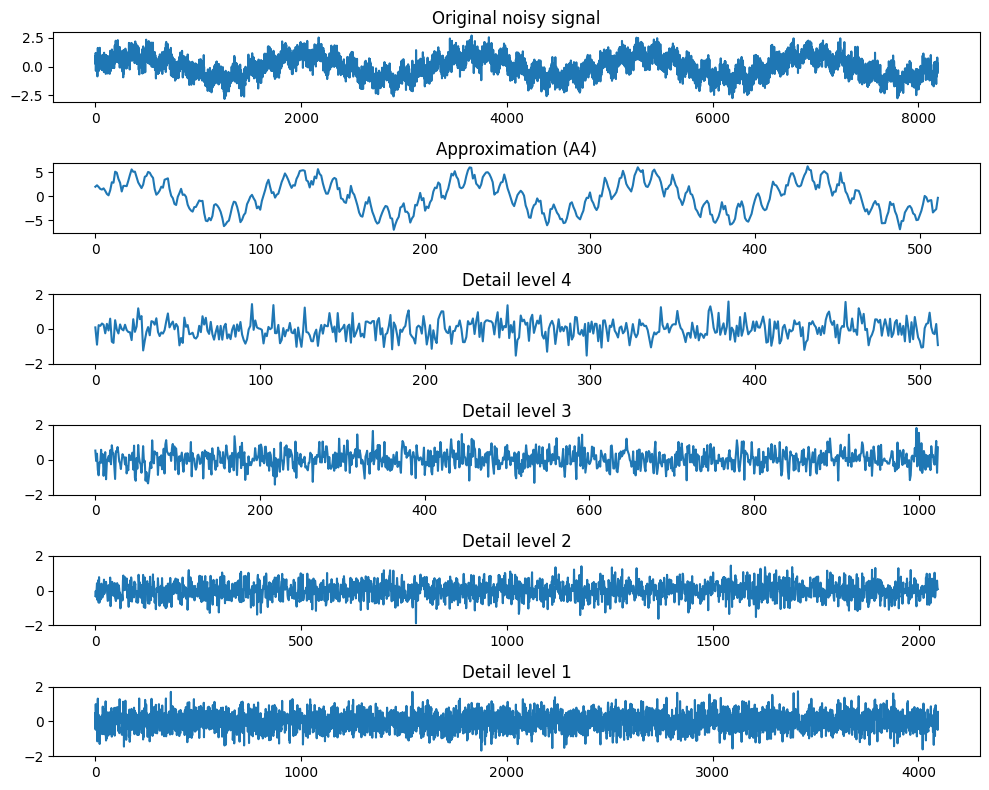

In [9]:
plt.figure(figsize=(10,8))
plt.subplot(6,1,1)
plt.plot(noisy_signal)
plt.title("Original noisy signal")
plt.subplot(6,1,2)
plt.plot(approximation)
plt.title("Approximation (A4)")
lims = (-2, 2)
for i, d in enumerate(details, start=1):
    level = 5 - i
    plt.subplot(6,1,i+2)
    plt.plot(d)
    plt.ylim(lims)
    plt.title(f"Detail level {level}")

plt.tight_layout()
plt.show()


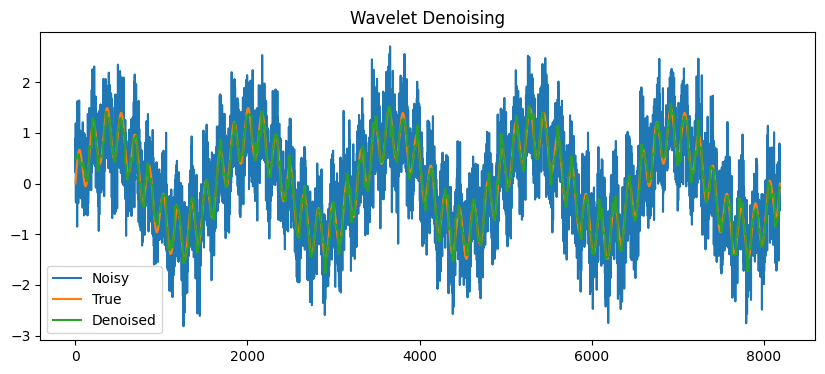

In [10]:

coeffs = pywt.wavedec(noisy, wavelet, level=4)

sigma = np.median(np.abs(coeffs[-1])) / 0.6745
n = len(noisy)
universal_thresh = sigma * np.sqrt(2 * np.log(n))

denoised_coeffs = [coeffs[0]] 

for d in coeffs[1:]:
    clean_d = pywt.threshold(d, value=universal_thresh, mode='soft')
    denoised_coeffs.append(clean_d)

denoised_signal = pywt.waverec(denoised_coeffs, wavelet)

plt.figure(figsize=(10,4))
plt.plot(noisy, label="Noisy")
plt.plot(signal, label="True")
plt.plot(denoised_signal, label="Denoised")
plt.legend()
plt.title("Wavelet Denoising")
plt.show()

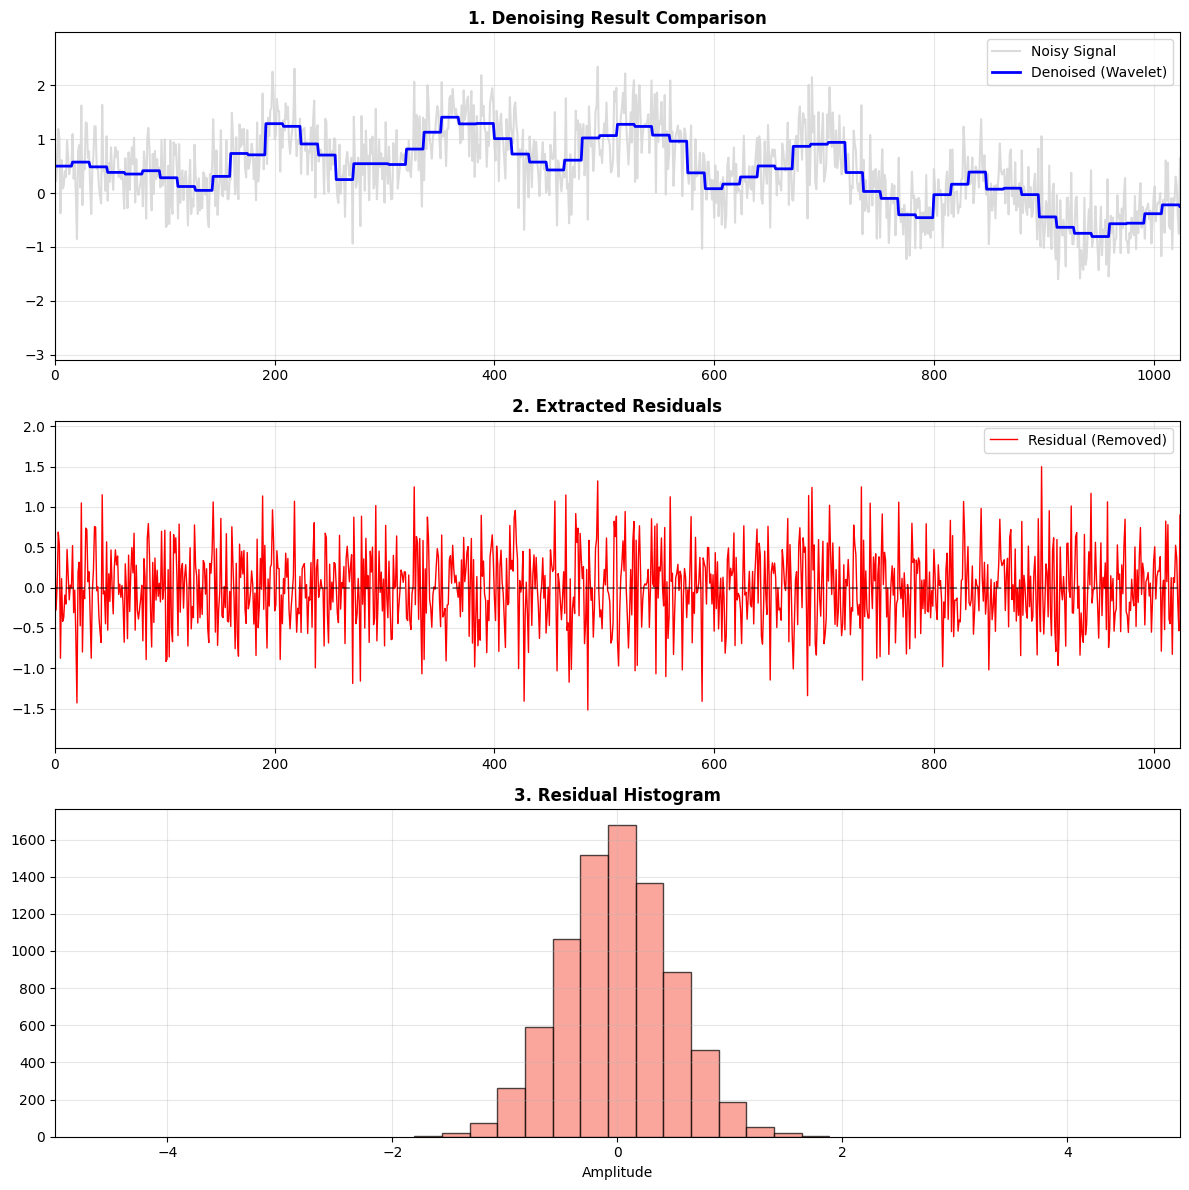

In [11]:
residual = noisy_signal - denoised_signal

fig, axs = plt.subplots(3, 1, figsize=(12, 12))

# 1. Noisy vs Denoised
axs[0].plot(noisy_signal, color='lightgray', label='Noisy Signal', alpha=0.8)
axs[0].plot(denoised_signal, color='blue', linewidth=2, label='Denoised (Wavelet)')
axs[0].set_xlim(0,1024)
axs[0].set_title("1. Denoising Result Comparison", fontweight='bold')
axs[0].legend()

# 2. The Residual (The "Noise" extracted)
axs[1].plot(residual, color='red', linewidth=1, label='Residual (Removed)')
axs[1].axhline(0, color='black', linestyle='--', alpha=0.5)
axs[1].set_xlim(0,1024)
axs[1].set_title("2. Extracted Residuals", fontweight='bold')
axs[1].legend()

# 3. Validation: Residual Distribution
axs[2].hist(residual, bins=15, color='salmon', edgecolor='black', alpha=0.7)
axs[2].set_xlim(-5,5)
axs[2].set_title("3. Residual Histogram", fontweight='bold')
axs[2].set_xlabel("Amplitude")

for ax in axs:
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Optional exercise with time and noise

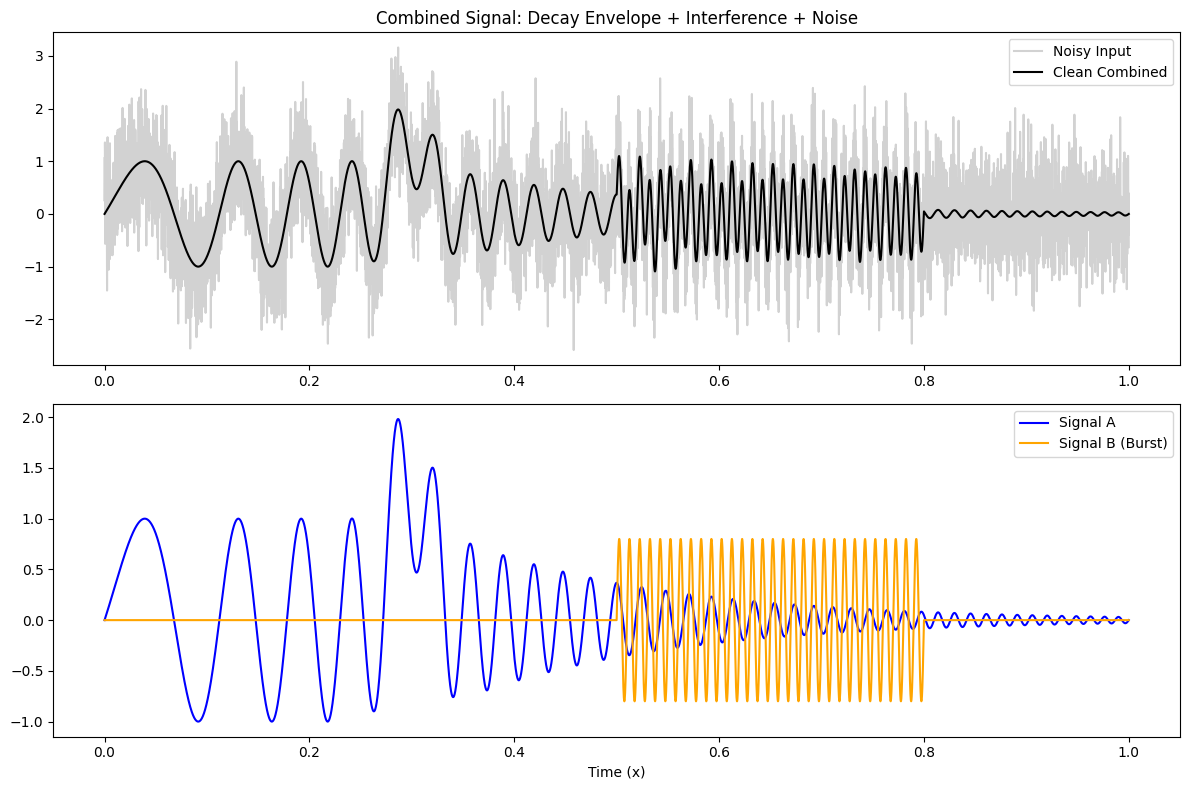

In [12]:
# 1. Setup
N = 8192
x = np.linspace(0, 1, N)
np.random.seed(0)

# SIGNAL A: Chirp + Spike + Exponential Decay
chirp_freq = (5 + 35 * x) * x
primary = np.sin(2 * np.pi * chirp_freq)

spike_pos = 0.3
spike = 1.5 * np.exp(-2000 * (x - spike_pos)**2)

# Exponential Decay Envelope: 
decay_constant = 5.0
envelope = np.where(x < spike_pos, 1.0, np.exp(-decay_constant * (x - spike_pos)))

signal_A = (primary * envelope) + spike

# SIGNAL B: High-Freq Burst (Still there)
signal_B = 0.8 * np.sin(2 * np.pi * 100 * x) * (x > 0.5) * (x < 0.8)

# COMBINE AND ADD NOISE
combined_true = signal_A + signal_B
noise = 0.6 * np.random.normal(size=x.shape)
noisy_signal = combined_true + noise

data = np.column_stack((x, signal_A, signal_B, combined_true, noisy_signal))
np.savetxt("decay_complex_signal.csv", data, delimiter=",", 
           header="x,signal_A,signal_B,combined_clean,noisy_input", comments='')

x, sA, sB, clean, noisy = np.loadtxt(
    "decay_complex_signal.csv", delimiter=",", skiprows=1, unpack=True
)

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(x, noisy, color='silver', alpha=0.7, label="Noisy Input")
plt.plot(x, clean, color='black', label="Clean Combined")
plt.title("Combined Signal: Decay Envelope + Interference + Noise")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(x, sA, color='blue', label="Signal A ")
plt.plot(x, sB, color='orange', label="Signal B (Burst)")
plt.xlabel("Time (x)")
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
# The task, as before, is to denoise the noisy_signal and recover signal_A and signal_B.
# You might want to consider adaptive thresholding. I.e. calculate different thresholds for different levels.
# Also, play with soft vs hard thresholding.
''' 
denoised_coeffs = [coeffs[0]] 
for i, d in enumerate(coeffs[1:]):
    level_scale = (i + 1) / len(coeffs[1:]) 
    level_threshold = universal_thresh * level_scale
    
    clean_d = pywt.threshold(d, level_threshold, mode='soft')
    denoised_coeffs.append(clean_d)

denoised_signal = pywt.waverec(denoised_coeffs, wavelet)
'''


" \ndenoised_coeffs = [coeffs[0]] \nfor i, d in enumerate(coeffs[1:]):\n    level_scale = (i + 1) / len(coeffs[1:]) \n    level_threshold = universal_thresh * level_scale\n    \n    clean_d = pywt.threshold(d, level_threshold, mode='soft')\n    denoised_coeffs.append(clean_d)\n\ndenoised_signal = pywt.waverec(denoised_coeffs, wavelet)\n"

Examples in 2D

c:\Users\User\Desktop\WaveLets\.venv\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


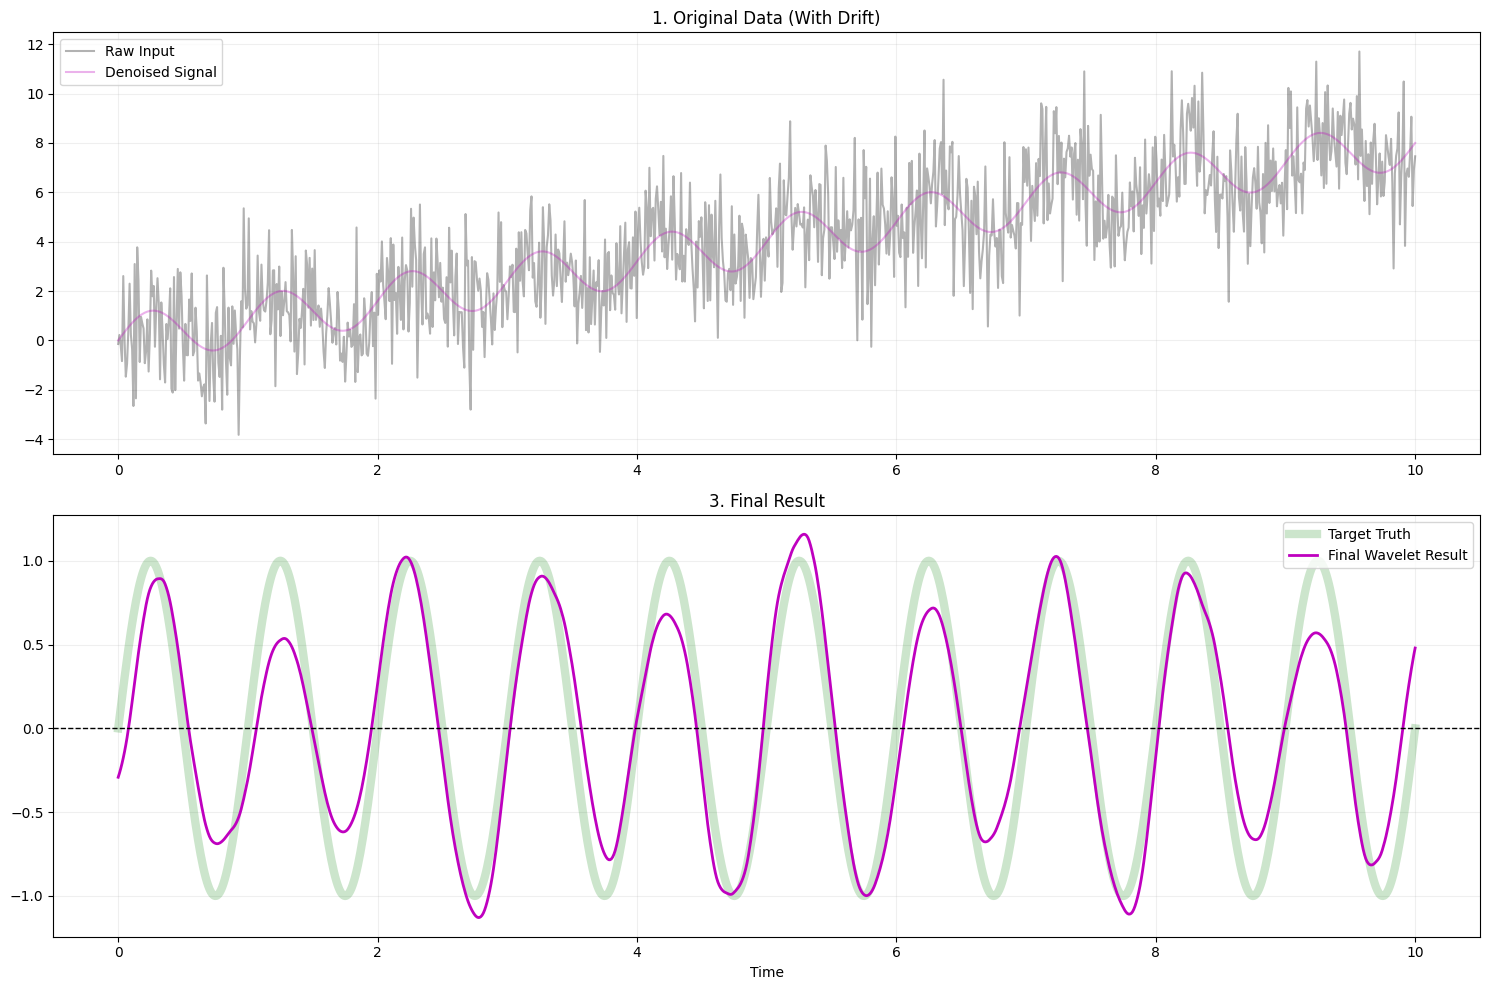

In [14]:
# Constant drift + noise removal in 2D sensor data
np.random.seed(0)

n_sensors, n_timepoints = 64, 1024
t = np.linspace(0, 10, n_timepoints)
base_signal = np.sin(2 * np.pi * 1.0 * t)
trend_matrix = (0.8 * t) + np.random.normal(0, 1.5, (n_sensors, n_timepoints))
signal_trend = np.tile(base_signal, (n_sensors, 1)) + (0.8 * t)
data_2d = np.tile(base_signal, (n_sensors, 1)) + trend_matrix + np.random.normal(0, 0.5, (n_sensors, n_timepoints))


wavelet = 'db6'
level = 6 
coeffs = pywt.wavedec2(data_2d, wavelet, level=level, mode='reflect')

coeffs[0] = np.zeros_like(coeffs[0]) # Since the trend is in the approximation part, we zero it out. Effectively removing it. 


for i in range(1, len(coeffs)):
    cH, cV, cD = coeffs[i]
    thresh = (np.median(np.abs(cD)) / 0.6745) * np.sqrt(2 * np.log(cD.size))
    coeffs[i] = (
        pywt.threshold(cH, thresh, mode='soft'),
        pywt.threshold(cV, thresh, mode='soft'),
        pywt.threshold(cD, thresh, mode='soft')
    )

final_cleaned = pywt.waverec2(coeffs, wavelet, mode='reflect')


sensor_idx = 12
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(t, data_2d[sensor_idx], 'k', alpha=0.3, label='Raw Input')
plt.plot(t, signal_trend[sensor_idx],'m', alpha = 0.3, label = 'Denoised Signal')
plt.title("1. Original Data (With Drift)"); plt.legend(); plt.grid(True, alpha=0.2)

plt.subplot(2, 1, 2)
plt.plot(t, base_signal, 'g', lw=6, alpha=0.2, label='Target Truth')
plt.plot(t, final_cleaned[sensor_idx], 'm', lw=2, label='Final Wavelet Result')
plt.axhline(0, color='black', lw=1, ls='--')
plt.title("3. Final Result"); plt.xlabel("Time"); plt.legend(); plt.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

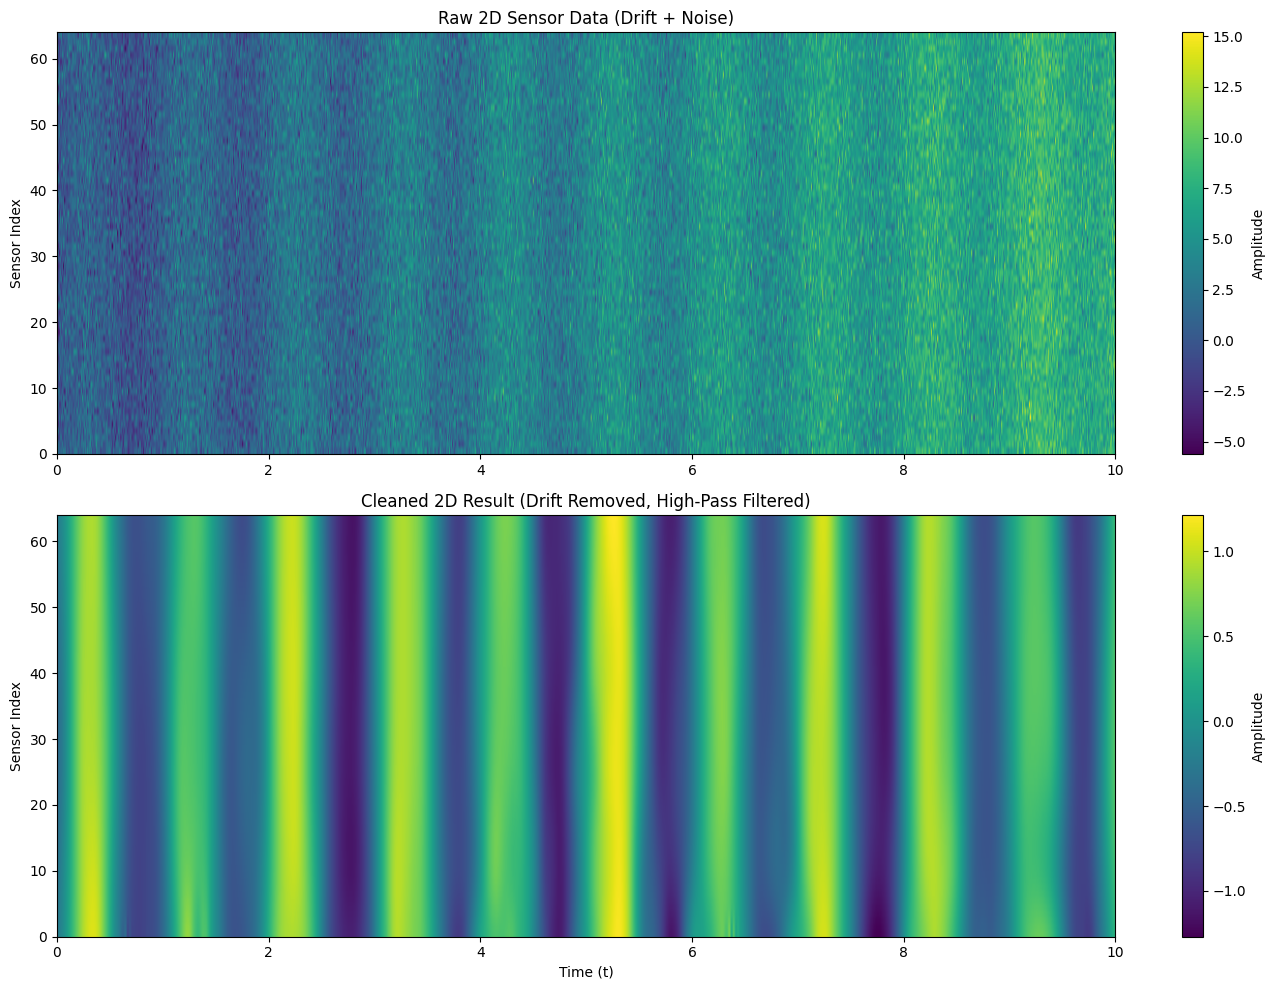

In [15]:
plt.figure(figsize=(14, 10))

# Raw Input Heatmap
plt.subplot(2, 1, 1)
plt.imshow(data_2d, aspect='auto', cmap='viridis', extent=[0, 10, 0, n_sensors])
plt.colorbar(label='Amplitude')
plt.title("Raw 2D Sensor Data (Drift + Noise)")
plt.ylabel("Sensor Index")

# Cleaned Result Heatmap
plt.subplot(2, 1, 2)
plt.imshow(final_cleaned, aspect='auto', cmap='viridis', extent=[0, 10, 0, n_sensors])
plt.colorbar(label='Amplitude')
plt.title("Cleaned 2D Result (Drift Removed, High-Pass Filtered)")
plt.ylabel("Sensor Index")
plt.xlabel("Time (t)")

plt.tight_layout()
plt.show()

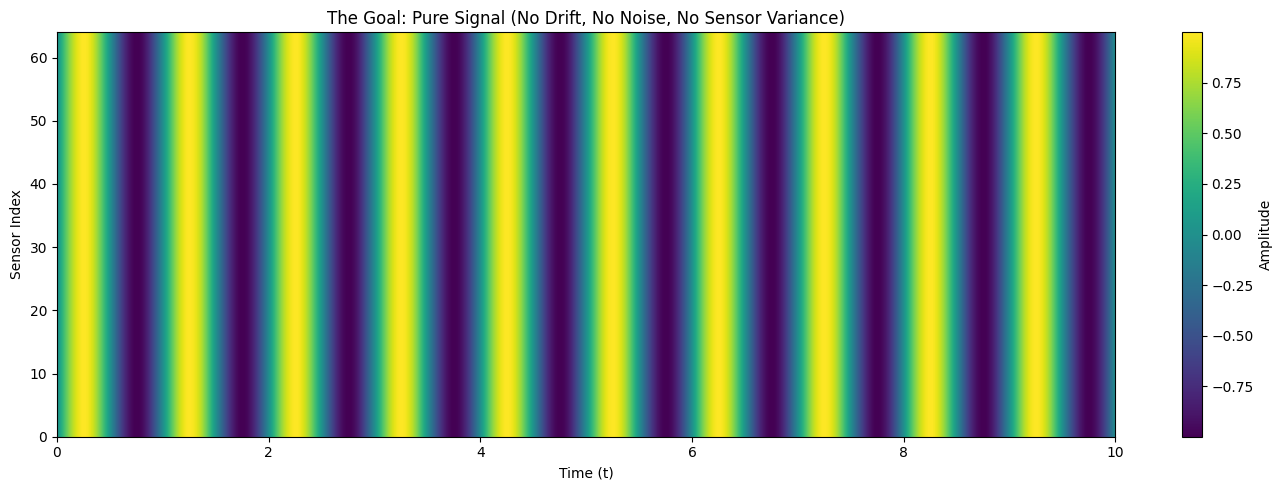

In [16]:
goal_matrix = np.tile(base_signal, (n_sensors, 1))

plt.figure(figsize=(14, 5))

# Plotting the Goal
plt.imshow(goal_matrix, aspect='auto', cmap='viridis', extent=[0, 10, 0, n_sensors])
plt.colorbar(label='Amplitude')

plt.title("The Goal: Pure Signal (No Drift, No Noise, No Sensor Variance)")
plt.ylabel("Sensor Index")
plt.xlabel("Time (t)")

plt.tight_layout()
plt.show()

Optional harder 2 Dimension excersice. Non-constant trend on the individual sensors. 
The easy fix of just setting the approximation to 0 no longer works.

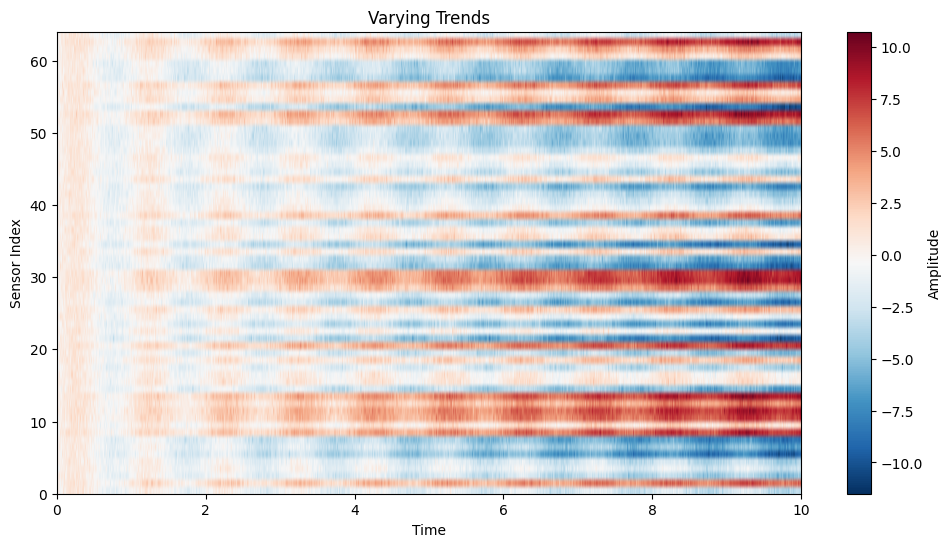

In [21]:
n_sensors, n_timepoints = 64, 1024
t = np.linspace(0, 10, n_timepoints)
np.random.seed(42)

base_signal = np.sin(2 * np.pi * 1.0 * t)

slopes = np.random.uniform(-1.0, 1.0, (n_sensors, 1))
trend_matrix = slopes * t

# Data
data_2d_trends = np.tile(base_signal, (n_sensors, 1)) + trend_matrix + np.random.normal(0, 0.5, (n_sensors, n_timepoints))

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(data_2d_trends, aspect='auto', cmap='RdBu_r', extent=[0, 10, 0, n_sensors])
plt.colorbar(label='Amplitude')
plt.title("Varying Trends")
plt.ylabel("Sensor Index")
plt.xlabel("Time")
plt.show()

In [22]:
from scipy import stats
# We assume a linear trend on the indivual sensors and detrend them first
detrended_data = np.zeros_like(data_2d_trends)
for i in range(n_sensors):
    slope, intercept, _, _, _ = stats.linregress(t, data_2d_trends[i])
    detrended_data[i] = data_2d_trends[i] - (slope * t + intercept)
    
wavelet = 'sym8'
level = 4 
coeffs = pywt.wavedec2(detrended_data, wavelet, level=level, mode='reflect')

for i in range(1, len(coeffs)):
    cH, cV, cD = coeffs[i]
    thresh = (np.median(np.abs(cD)) / 0.6745) * np.sqrt(2 * np.log(cD.size))
    coeffs[i] = (
        pywt.threshold(cH, thresh, mode='soft'),
        pywt.threshold(cV, thresh, mode='soft'),
        pywt.threshold(cD, thresh, mode='soft')
    )

final_cleaned = pywt.waverec2(coeffs, wavelet, mode='reflect')

c:\Users\User\Desktop\WaveLets\.venv\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(


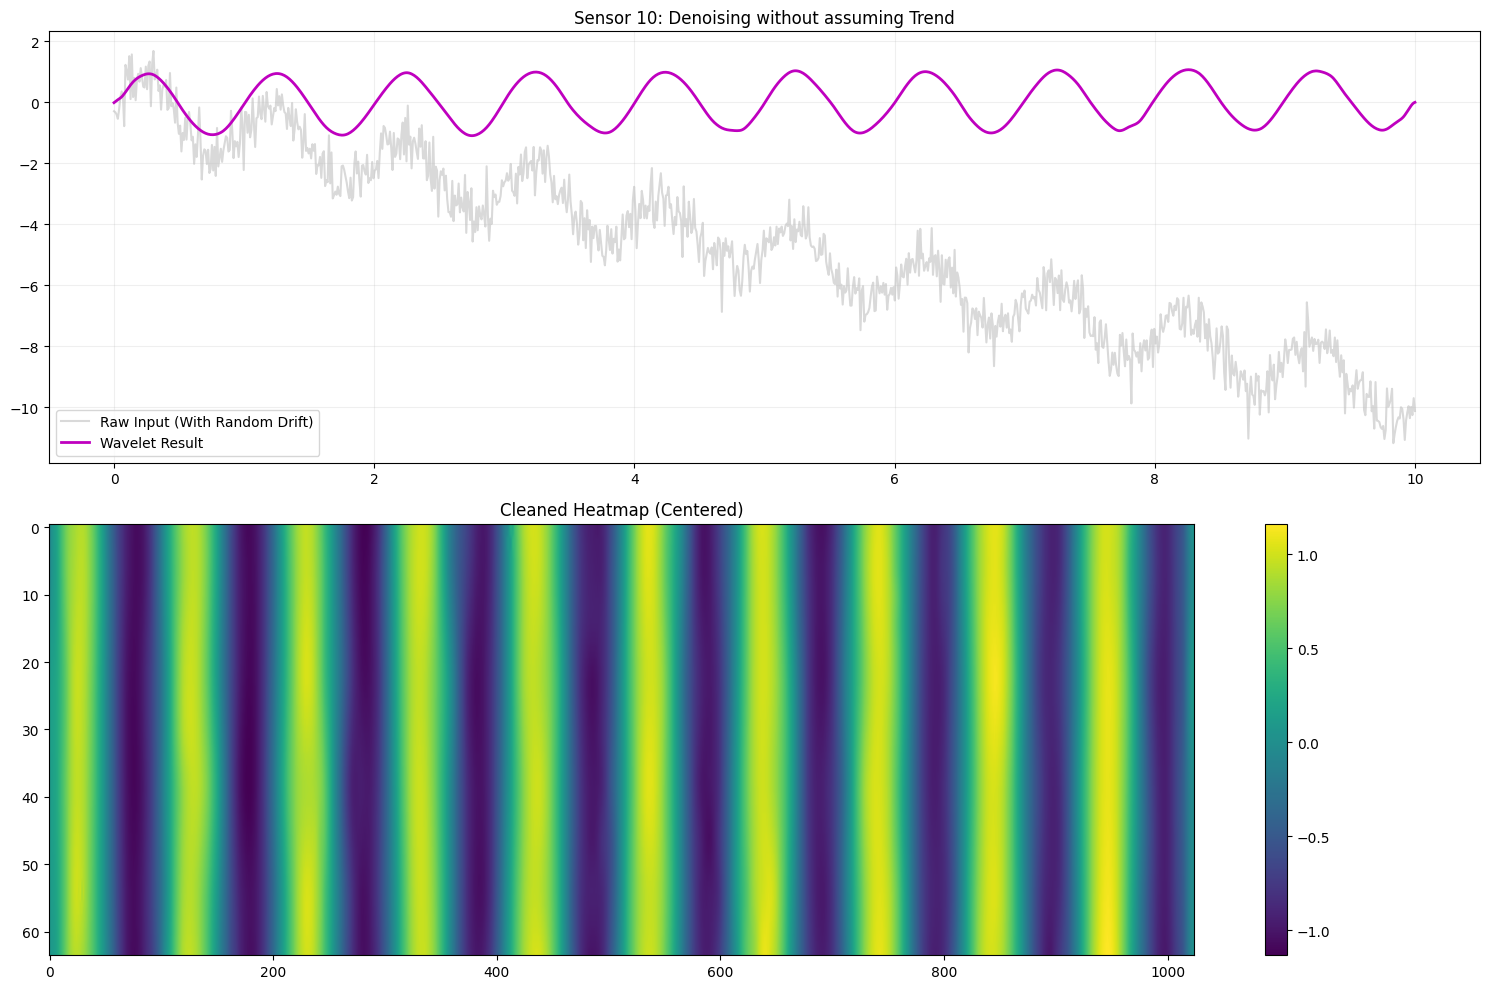

In [23]:
sensor_idx = 10
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(t, data_2d_trends[sensor_idx], color='silver', alpha=0.6, label='Raw Input (With Random Drift)')
plt.plot(t, final_cleaned[sensor_idx], color='m', lw=2, label='Wavelet Result')
plt.title(f"Sensor {sensor_idx}: Denoising without assuming Trend")
plt.legend(); plt.grid(True, alpha=0.2)

plt.subplot(2, 1, 2)
centered_result = final_cleaned
plt.imshow(centered_result[:, :n_timepoints], aspect='auto', cmap='viridis')
plt.title("Cleaned Heatmap (Centered)")
plt.colorbar()

plt.tight_layout()
plt.show()